## Evaluating my approach to target identification

##### Notebook Aim:

> The aim of this notebook is to compare different approaches to identifying target players from a phrase of a football match report 

##### Outcome:

> Produce the best possible method for identifying the target player without increasing the number of false positives (identifying players that are not targets)

##### Methods:

> - The model text has been scraped from articles on the first page of 'The Mirror' match report site
- It has been split into sentences and then split again by commas to produce short phrases
- I will evaluate each method by comparing it to a manually annotated dataset of the same phrases
- The accuracy of each method will be determined by the number of rows that identified the same target(s) as identified in the annotated dataset

--------

### Import the Annotated Data

#### Create a Dataframe from Model Phrases

In [326]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)

In [327]:
annotated_df = pd.read_csv('annotated_data.csv')

In [328]:
import numpy as np

In [329]:
# Replace NaN with empty string
annotated_df = annotated_df.replace(np.nan, '', regex=True)

-----

### Extract Sentences Column for Target Identification

In [330]:
phrases_df = pd.DataFrame(annotated_df['Sentence'])

-----

## Target Identification

In [331]:
import spacy

In [332]:
# load spaCy model
nlp = spacy.load("en_core_web_sm")

In [333]:
import targetevaluation_playernames

In [334]:
# Flatten list of player names
players = [y for x in list(targetevaluation_playernames.player_names.values()) for y in x]

> ### Approach 1 - Identify NSubj
- Function will extract players that are the main subject of a sentence

In [335]:
def identify_nsubj(string):
    
    # Create spacy object from string
    doc = nlp(string)
    
    # Create empty nsubj list
    nsubj = []
    
    # Iterate through doc object
    for i, tok in enumerate(doc):
        # Check for NSubj only if tok is a proper noun and it's length is greater than 2
        if str(tok.dep_) == "nsubj" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            # Apped subject if it matches with a player
            nsubj.append([player for player in players if tok.text in player])
    
    # return a flattened list
    return str([y for x in nsubj for y in x])[1:-1].replace("'", "")

In [336]:
# Apply function to phrases_df
phrases_df['nsubj'] = phrases_df['Sentence'].apply(identify_nsubj)

> ### Approach 2 - Identify NSubj and Subjpass
- Function will extract players that are main subject of a sentence and passive subjects of a sentence 

In [337]:
def identify_nsubj_passsubj(string):
    
    # Create spacy object from string
    doc = nlp(string)
    
    # Create empty nsubj list
    nsubj_passsubj = []
    
    # Iterate through doc object
    for i, tok in enumerate(doc):
        # ADDING NSUBJ
        # Check for NSubj only if tok is a proper noun and it's length is greater than 2
        if str(tok.dep_) == "nsubj" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            # Apped subject if it matches with a player
            nsubj_passsubj.append([player for player in players if tok.text in player])
        # ADDING SUBJPASS
        elif str(tok.dep_) == "subjpass" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            nsubj_passsubj.append([player for player in players if tok.text in player])
            
    # return a flattened list        
    return str([y for x in nsubj_passsubj for y in x])[1:-1].replace("'", "")

In [338]:
# Apply function to phrases_df
phrases_df['nsubj_passsubj'] = phrases_df['Sentence'].apply(identify_nsubj_passsubj)

> ### Approach 3 - Identify Nsubj and Pobj
- Function will extract players that are main subject of a sentence and objects of a preposition 

In [339]:
def identify_nsubj_pobj(string):
    
    # Create spacy object from string
    doc = nlp(string)
    
    # Create empty nsubj list
    nsubj_pobj = []
    
    # Iterate through doc object
    for i, tok in enumerate(doc):
        # ADDING NSUBJ
        # Check for NSubj only if tok is a proper noun and it's length is greater than 2
        if str(tok.dep_) == "nsubj" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            # Apped subject if it matches with a player
            nsubj_pobj.append([player for player in players if tok.text in player])
        # ADDING POBJ
        elif str(tok.dep_) == "pobj" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            nsubj_pobj.append([player for player in players if tok.text in player])
            
    # return a flattened list        
    return str([y for x in nsubj_pobj for y in x])[1:-1].replace("'", "")

In [340]:
# Apply function to phrases_df
phrases_df['nsubj_pobj'] = phrases_df['Sentence'].apply(identify_nsubj_pobj)

> ### Approach 4 - Identify Nsubj, Pobj and Dobj
- Function will extract players that are main subject of a sentence, objects of a preposition and direct object of a sentence

In [341]:
def identify_nsubj_pobj_dobj(string):
    
    # Create spacy object from string
    doc = nlp(string)
    
    # Create empty nsubj list
    nsubj_pobj_dobj = []
    
    # Iterate through doc object
    for i, tok in enumerate(doc):
        # ADDING NSUBJ
        # Check for NSubj only if tok is a proper noun and it's length is greater than 2
        if str(tok.dep_) == "nsubj" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            # Apped subject if it matches with a player
            nsubj_pobj_dobj.append([player for player in players if tok.text in player])
        # ADDING POBJ
        elif str(tok.dep_) == "pobj" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            nsubj_pobj_dobj.append([player for player in players if tok.text in player])
        # ADDING DOBJ
        elif str(tok.dep_) == "dobj" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            nsubj_pobj_dobj.append([player for player in players if tok.text in player])
            
    # return a flattened list        
    return str([y for x in nsubj_pobj_dobj for y in x])[1:-1].replace("'", "")

In [342]:
# Apply function to phrases_df
phrases_df['nsubj_pobj_dobj'] = phrases_df['Sentence'].apply(identify_nsubj_pobj_dobj)

> ### Approach 5 - Identify Nsubj, Dobj
- Function will extract players that are main subject of a sentence and direct objects of a sentence

In [343]:
def identify_nsubj_dobj(string):
    
    # Create spacy object from string
    doc = nlp(string)
    
    # Create empty nsubj list
    nsubj_dobj = []
    
    # Iterate through doc object
    for i, tok in enumerate(doc):
        # ADDING NSUBJ
        # Check for NSubj only if tok is a proper noun and it's length is greater than 2
        if str(tok.dep_) == "nsubj" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            # Apped subject if it matches with a player
            nsubj_dobj.append([player for player in players if tok.text in player])
        # ADDING DOBJ
        elif str(tok.dep_) == "dobj" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            nsubj_dobj.append([player for player in players if tok.text in player])
            
    # return a flattened list        
    return str([y for x in nsubj_dobj for y in x])[1:-1].replace("'", "")

In [344]:
# Apply function to phrases_df
phrases_df['nsubj_dobj'] = phrases_df['Sentence'].apply(identify_nsubj_dobj)

> ### Approach 6 - Identify Nsubj, Poss
- Function will extract players that are main subject of a sentence and possessives

In [345]:
def identify_nsubj_poss(string):
    
    # Create spacy object from string
    doc = nlp(string)
    
    # Create empty nsubj list
    nsubj_poss = []
    
    # Iterate through doc object
    for i, tok in enumerate(doc):
        # ADDING NSUBJ
        # Check for NSubj only if tok is a proper noun and it's length is greater than 2
        if str(tok.dep_) == "nsubj" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            # Apped subject if it matches with a player
            nsubj_poss.append([player for player in players if tok.text in player])
        # ADDING POSS
        elif str(tok.dep_) == "poss" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            nsubj_poss.append([player for player in players if tok.text in player])
            
    # return a flattened list        
    return str([y for x in nsubj_poss for y in x])[1:-1].replace("'", "")

In [346]:
# Apply function to phrases_df
phrases_df['nsubj_poss'] = phrases_df['Sentence'].apply(identify_nsubj_poss)

> ### Approach 7 - Identify Nsubj, Pobj, Dobj and Poss
- Function will extract players that are main subject of a sentence, object of a preposition, direct object and possessives

In [347]:
def identify_nsubj_pobj_dobj_poss(string):
    
    # Create spacy object from string
    doc = nlp(string)
    
    # Create empty nsubj list
    nsubj_pobj_dobj_poss = []
    
    # Iterate through doc object
    for i, tok in enumerate(doc):
        # ADDING NSUBJ
        # Check for NSubj only if tok is a proper noun and it's length is greater than 2
        if str(tok.dep_) == "nsubj" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            # Apped subject if it matches with a player
            nsubj_pobj_dobj_poss.append([player for player in players if tok.text in player])
        # ADDING POBJ
        elif str(tok.dep_) == "pobj" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            nsubj_pobj_dobj_poss.append([player for player in players if tok.text in player])
        # ADDING DOBJ
        elif str(tok.dep_) == "dobj" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            nsubj_pobj_dobj_poss.append([player for player in players if tok.text in player])
        # ADDING POSS
        elif str(tok.dep_) == "poss" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            nsubj_pobj_dobj_poss.append([player for player in players if tok.text in player])
            
    # return a flattened list        
    return str([y for x in nsubj_pobj_dobj_poss for y in x])[1:-1].replace("'", "")

In [348]:
# Apply function to phrases_df
phrases_df['nsubj_pobj_dobj_poss'] = phrases_df['Sentence'].apply(identify_nsubj_pobj_dobj_poss)

> ### Approach 8 - Identify Nsubj, Pobj and Poss
- Function will extract players that are main subject of a sentence, object of a preposition and possessives

In [365]:
def identify_nsubj_pobj_poss(string):
    
    # Create spacy object from string
    doc = nlp(string)
    
    # Create empty nsubj_pobj_poss list
    nsubj_pobj_poss = []
    
    # Iterate through doc object
    for i, tok in enumerate(doc):
        # ADDING NSUBJ
        # Check for NSubj only if tok is a proper noun and it's length is greater than 2
        if str(tok.dep_) == "nsubj" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            # Apped subject if it matches with a player
            nsubj_pobj_poss.append([player for player in players if tok.text in player])
        # ADDING POBJ
        elif str(tok.dep_) == "pobj" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            nsubj_pobj_poss.append([player for player in players if tok.text in player])
        # ADDING POSS
        elif str(tok.dep_) == "poss" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            nsubj_pobj_poss.append([player for player in players if tok.text in player])
            
    # return a flattened list        
    return str([y for x in nsubj_pobj_poss for y in x])[1:-1].replace("'", "")

In [366]:
# Apply function to phrases_df
phrases_df['nsubj_pobj_poss'] = phrases_df['Sentence'].apply(identify_nsubj_pobj_poss)

> ### Approach 9 - Identify Nsubj, Dobj, Poss
- Function will extract players that are main subject of a sentence, direct object and possessives

In [367]:
def identify_nsubj_dobj_poss(string):
    
    # Create spacy object from string
    doc = nlp(string)
    
    # Create empty nsubj_pobj_poss list
    nsubj_dobj_poss = []
    
    # Iterate through doc object
    for i, tok in enumerate(doc):
        # ADDING NSUBJ
        # Check for NSubj only if tok is a proper noun and it's length is greater than 2
        if str(tok.dep_) == "nsubj" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            # Apped subject if it matches with a player
            nsubj_dobj_poss.append([player for player in players if tok.text in player])
        # ADDING POBJ
        elif str(tok.dep_) == "dobj" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            nsubj_dobj_poss.append([player for player in players if tok.text in player])
        # ADDING POSS
        elif str(tok.dep_) == "poss" and str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            nsubj_dobj_poss.append([player for player in players if tok.text in player])
            
    # return a flattened list        
    return str([y for x in nsubj_dobj_poss for y in x])[1:-1].replace("'", "")

In [368]:
# Apply function to phrases_df
phrases_df['nsubj_dobj_poss'] = phrases_df['Sentence'].apply(identify_nsubj_dobj_poss)

> ### Approach 10 - Identify any mention of a player
- Function will extract any player that is mentioned in the sentence

In [349]:
def identify_mention(string):
    
    # Create spacy object from string
    doc = nlp(string)
    
    # Create empty nsubj list
    mention = []
    
    # Iterate through doc object
    for i, tok in enumerate(doc):
        # Check if tok is a proper noun and it's length is greater than 2
        if str(tok.pos_) == "PROPN" and len(tok.text) > 2:
            # Apped subject if it matches with a player
            mention.append([player for player in players if tok.text in player])
            
    
    
    # return a flattened list
    return str(list(dict.fromkeys([y.strip("''") for x in mention for y in x])))[1:-1].replace("'", "")

In [350]:
# Apply function to phrases_df
phrases_df['mention'] = phrases_df['Sentence'].apply(identify_mention)

----

### Compare accuracy of approaches

> ##### Function to calculate accuracy score of approach will:
- Compare common rows between annotated dataset and column in phrases df
- Produce a confusion score for false positives, false negatives, true negatives, true positives

Accuracy Score = `(correct matches / length of dataframe) * 100`

In [476]:
def accuracy(df_column):
    
    # Accuracy counter 
    accuracy_counter = 0
    
    # Confusion score dictionary
    confusion_dictionary = {
        "Approach": df_column,
        "True Positive": 0,
        "True Negative": 0,
        "False Positive": 0,
        "False Negative": 0
    }
    
    # ====================
    # ACCURACY SCORE 
    # ====================
    
    # Iterate through phrases_df & annotated_df
    for index, row in phrases_df.iterrows():
        # Increment Accuracy Score
        if row[df_column] == annotated_df.iloc[index]["Target"]:
            accuracy_counter += 1
        else: 
            continue
    
    
    for index, row in phrases_df.iterrows():
        # ====================
        # CONFUSION DICTIONARY 
        # ====================
        
        # If targets are equal
        if row[df_column] == annotated_df.iloc[index]["Target"]:
            # Increment True Positive
            if annotated_df.iloc[index]["Target"] != "":
                confusion_dictionary["True Positive"] += 1
            # Increment True Negative
            elif annotated_df.iloc[index]["Target"] == "":
                confusion_dictionary["True Negative"] += 1
            # Print Error
            else: 
                print("Error 1: Conditions don't catch all cases")
        elif row[df_column] != annotated_df.iloc[index]["Target"]:
            # Increment False Positive
            if annotated_df.iloc[index]["Target"] == "":
                confusion_dictionary["False Positive"] += 1
            # Increment False Negative
            elif annotated_df.iloc[index]["Target"] != "" and row[df_column] == "":
                confusion_dictionary["False Negative"] += 1
            # If Neither are blank but they don't match ---> Split the two columns into lists and work out which is longer
            else:
                # If the annotated entry is longer then its a false negative because targets weren't recognised
                if len(annotated_df.iloc[index]["Target"].split(',')) > len(row[df_column].split(',')):
                    confusion_dictionary["False Negative"] += 1
                # If the phrases_df entry is longer then its a false positive because targets were recognised that weren't there
                elif len(annotated_df.iloc[index]["Target"].split(',')) < len(row[df_column].split(',')):
                    confusion_dictionary["False Positive"] += 1
                # If the they match in length its a false positive because the entries weren't the same
                elif len(annotated_df.iloc[index]["Target"].split(',')) == len(row[df_column].split(',')):
                    confusion_dictionary["False Positive"] += 1
                else: 
                    print("Error 2: Conditions don't catch all cases")
                
        else: 
            print("Error 3: Conditions don't catch all cases")
            
        
        
            
            
    
    # Calculate Accuracy Score
    accuracy_score = (accuracy_counter / len(phrases_df)) * 100
    
    
    return  round(accuracy_score, 3), confusion_dictionary

> ### Test Accuracy - Approach 1

In [477]:
# Save Variables
accuracy_1, confusion_1 = accuracy("nsubj")

In [478]:
# Print Variables
print("Accuracy Score:", accuracy_1, confusion_1)

Accuracy Score: 84.97 {'Approach': 'nsubj', 'True Positive': 40, 'True Negative': 384, 'False Positive': 3, 'False Negative': 72}


> ### Test Accuracy - Approach 2

In [479]:
# Save Variables
accuracy_2, confusion_2 = accuracy("nsubj_passsubj")

In [480]:
# Print Variables
print("Accuracy Score:", accuracy_2, confusion_2)

Accuracy Score: 84.97 {'Approach': 'nsubj_passsubj', 'True Positive': 40, 'True Negative': 384, 'False Positive': 3, 'False Negative': 72}


> ### Test Accuracy - Approach 3

In [481]:
# Save Variables
accuracy_3, confusion_3 = accuracy("nsubj_pobj")

In [482]:
# Print Variables
print("Accuracy Score:", accuracy_3, confusion_3)

Accuracy Score: 88.978 {'Approach': 'nsubj_pobj', 'True Positive': 64, 'True Negative': 380, 'False Positive': 10, 'False Negative': 45}


> ### Test Accuracy - Approach 4

In [483]:
# Save Variables
accuracy_4, confusion_4 = accuracy("nsubj_pobj_dobj")

In [484]:
# Print Variables
print("Accuracy Score:", accuracy_4, confusion_4)

Accuracy Score: 88.577 {'Approach': 'nsubj_pobj_dobj', 'True Positive': 64, 'True Negative': 378, 'False Positive': 15, 'False Negative': 42}


> ### Test Accuracy - Approach 5

In [485]:
# Save Variables
accuracy_5, confusion_5 = accuracy("nsubj_dobj")

In [486]:
# Print Variables
print("Accuracy Score:", accuracy_5, confusion_5)

Accuracy Score: 84.569 {'Approach': 'nsubj_dobj', 'True Positive': 40, 'True Negative': 382, 'False Positive': 9, 'False Negative': 68}


> ### Test Accuracy - Approach 6

In [487]:
# Save Variables
accuracy_6, confusion_6 = accuracy("nsubj_poss")

In [488]:
# Print Variables
print("Accuracy Score:", accuracy_6, confusion_6)

Accuracy Score: 84.569 {'Approach': 'nsubj_poss', 'True Positive': 43, 'True Negative': 379, 'False Positive': 16, 'False Negative': 61}


> ### Test Accuracy - Approach 7

In [489]:
# Save Variables
accuracy_7, confusion_7 = accuracy("nsubj_pobj_dobj_poss")

In [490]:
# Print Variables
print("Accuracy Score:", accuracy_7, confusion_7)

Accuracy Score: 88.577 {'Approach': 'nsubj_pobj_dobj_poss', 'True Positive': 68, 'True Negative': 374, 'False Positive': 26, 'False Negative': 31}


> ### Test Accuracy - Approach 8

In [491]:
# Save Variables
accuracy_8, confusion_8 = accuracy("nsubj_pobj_poss")

In [492]:
# Print Variables
print("Accuracy Score:", accuracy_8, confusion_8)

Accuracy Score: 88.778 {'Approach': 'nsubj_pobj_poss', 'True Positive': 67, 'True Negative': 376, 'False Positive': 22, 'False Negative': 34}


> ### Test Accuracy - Approach 9

In [493]:
# Save Variables
accuracy_9, confusion_9 = accuracy("nsubj_dobj_poss")

In [494]:
# Print Variables
print("Accuracy Score:", accuracy_9, confusion_9)

Accuracy Score: 84.369 {'Approach': 'nsubj_dobj_poss', 'True Positive': 44, 'True Negative': 377, 'False Positive': 21, 'False Negative': 57}


> ### Test Accuracy - Approach 10

In [495]:
# Save Variables
accuracy_10, confusion_10 = accuracy("mention")

In [496]:
# Print Variables
print("Accuracy Score:", accuracy_10, confusion_10)

Accuracy Score: 79.96 {'Approach': 'mention', 'True Positive': 61, 'True Negative': 338, 'False Positive': 87, 'False Negative': 13}


------

## Visualising the results

#### Make a DataFrame from the results

In [497]:
results_df = pd.DataFrame([confusion_1, confusion_2, confusion_3, confusion_4, confusion_5, confusion_6, confusion_7, confusion_8, confusion_9, confusion_10])

In [498]:
results_df["Accuracy"] = [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_8, accuracy_9, accuracy_10]

In [499]:
results_df

,Approach,False Negative,False Positive,True Negative,True Positive,Accuracy
0,nsubj,72,3,384,40,84.970
1,nsubj_passsubj,72,3,384,40,84.970
2,nsubj_pobj,45,10,380,64,88.978
3,nsubj_pobj_dobj,42,15,378,64,88.577
4,nsubj_dobj,68,9,382,40,84.569
5,nsubj_poss,61,16,379,43,84.569
6,nsubj_pobj_dobj_poss,31,26,374,68,88.577
7,nsubj_pobj_poss,34,22,376,67,88.778
8,nsubj_dobj_poss,57,21,377,44,84.369
9,mention,13,87,338,61,79.960


### Visualise the Accuracy Scores

In [541]:
import seaborn as sns

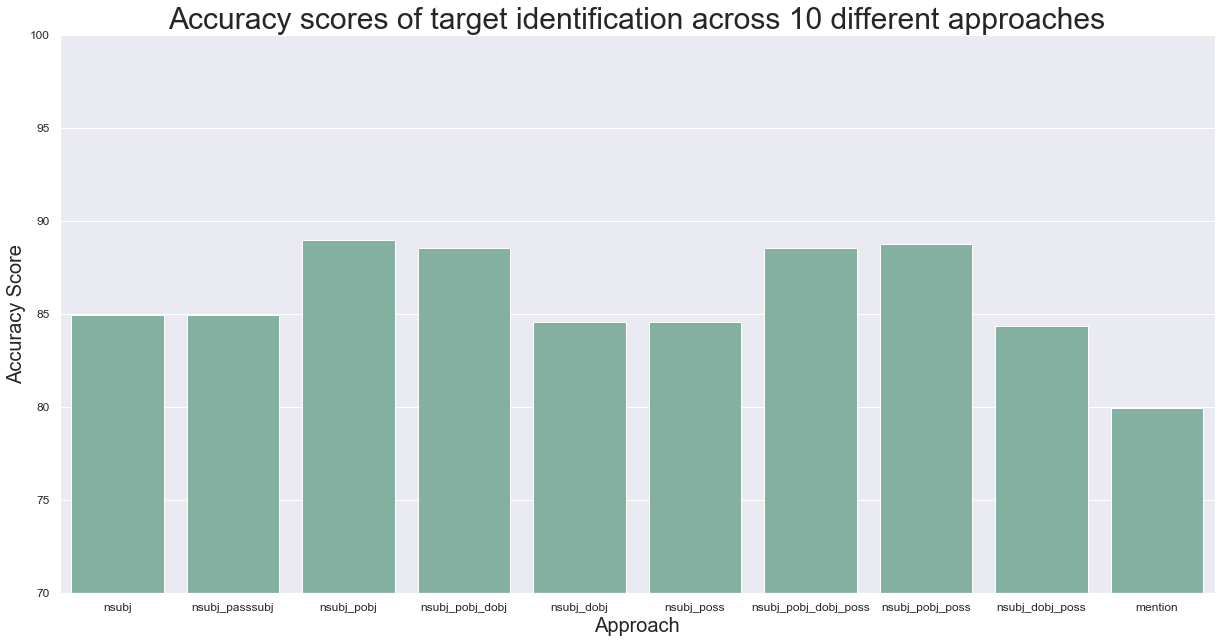

In [571]:
# Set Chart Options
sns.set(rc={'figure.figsize':(20.7,10.27), })
sns.set(style="darkgrid")
accuracy_chart = sns.barplot(x="Approach", y="Accuracy", data=results_df, color="#7CB7A3")
plt.ylim(70, 100)
accuracy_chart.axes.set_title("Accuracy scores of target identification across 10 different approaches",fontsize=30)
accuracy_chart.set_xlabel("Approach",fontsize=20)
accuracy_chart.set_ylabel("Accuracy Score",fontsize=20)
accuracy_chart.tick_params(labelsize=12)

### Visualise N False Positives

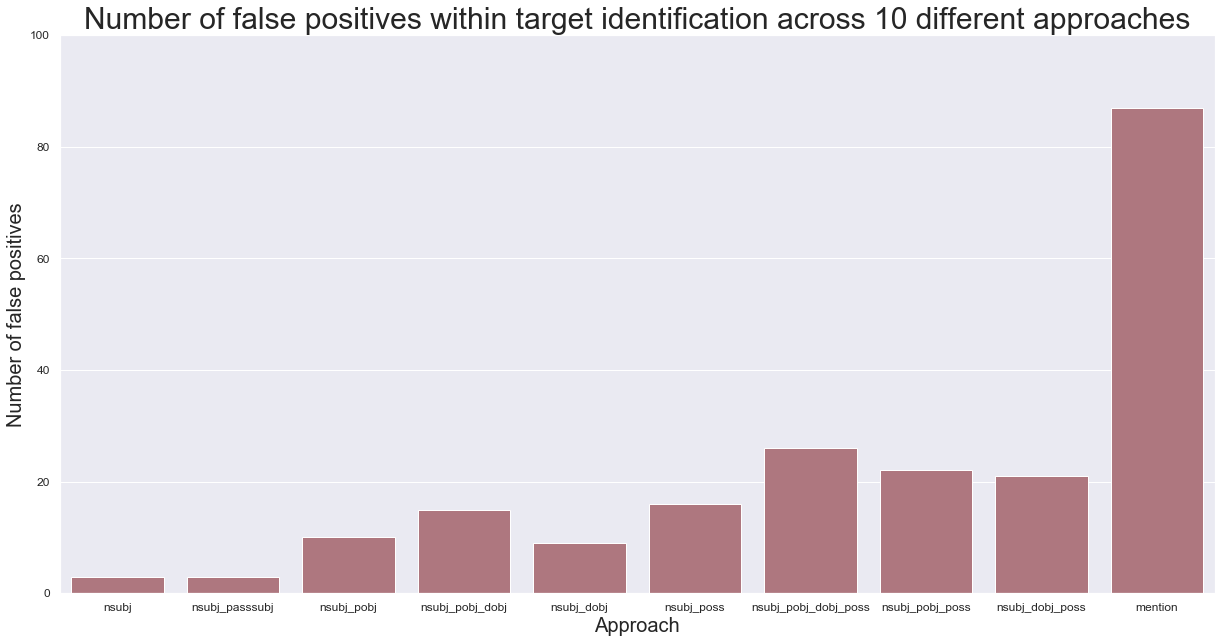

In [574]:
false_positives_chart = sns.barplot(x="Approach", y="False Positive", data=results_df, color="#B76E79")
plt.ylim(0, 100)
false_positives_chart.axes.set_title("Number of false positives within target identification across 10 different approaches",fontsize=30)
false_positives_chart.set_xlabel("Approach",fontsize=20)
false_positives_chart.set_ylabel("Number of false positives",fontsize=20)
false_positives_chart.tick_params(labelsize=12)

### Visualise Accuracy vs False Positives

In [1]:
plt.figure(figsize=(136, 206))
sns.set(rc={'figure.figsize':(20.7,10.27), })
accuracy_vs_falsepositives = sns.lmplot( x="Accuracy", y="False Positive", data=results_df, fit_reg=False, hue='Approach', legend=True)
false_positives_chart.axes.set_title("Number of false positives within target identification across 10 different approaches",fontsize=30)
false_positives_chart.set_xlabel("Approach",fontsize=20)
false_positives_chart.set_ylabel("Number of false positives",fontsize=20)
false_positives_chart.tick_params(labelsize=12)


NameError: name 'plt' is not defined

---- 

### Where to go from here?
> ##### Avenues I haven't explored:
    - Co-reference Resolution: Identifying who 'He' is referring to 
    - Conditional adding of possessives / objects: Only adding target from a possessive reference if the possessive is part of the sentence subject 
    - Using a classifier to predict the target player
    - Adding targets based on their position in an nltk parse tree
    - Expanding annotated dataset to produce more detailed experiment